# PRÁCTICAS DE REDES NEURONALES ARTIFICIALES (TSCAO): Parte IV

## 4. Redes Neuronales Recurrentes.

Es útil comprender al menos algunos de los conceptos básicos antes de comenzar con la implementación. Una red neuronal recurrente (RNN) procesa secuencias, ya sea precios diarios de acciones, frases o mediciones de sensores, se procesará por ejemplo un elemento por unidad de tiempo (cada vez) y la RNN mientras tanto retendrá en una memoria (llamada estado) lo que ha sucedido previamente en la secuencia.

Recurrente significa que la salida en el paso de tiempo actual se convierte en la entrada al siguiente paso de tiempo. En cada elemento de la secuencia, el modelo considera no solo la entrada actual, sino lo que recuerda acerca de los elementos anteriores.

Esta memoria permite a la red aprender dependencias a largo plazo en una secuencia, lo que significa que puede tener en cuenta todo el contexto al hacer una predicción, ya sea la siguiente palabra en una frase, una clasificación de sentimientos o la próxima medición de temperatura. Una RNN está diseñada para imitar la forma humana de procesar secuencias: consideramos la oración completa al formar una respuesta en lugar de palabras por sí mismas. 

Hoy por hoy las redes más utilizadas y populares son las redes LSTM (Long Short-Term Memory). En el corazón de una red recurrente LSTM hay una capa de celdas de memoria. Estas RNA mantienen un estado de sus celdas tal que la transmisión de la señal entre las neuronas (información en forma de gradiente) no se pierda a medida que se procesa la secuencia. En cada paso de tiempo, la LSTM considera la entrada actual, el "acarreo" y el estado de la celda.

Las celdas de memoria (unidades neuronales) asociadas a la red LSTM tienen 3 puertas y vectores de peso diferentes: hay una puerta para "olvidar" y descartar información irrelevante; una puerta de "entrada" para manejar la entrada actual, y una puerta de "salida" para producir predicciones en cada paso de tiempo. Sin embargo, como señala Chollet, es infructuoso tratar de asignar significados específicos a cada uno de los elementos de la celda.

La función de cada elemento celular de la LSTM se decide en última instancia por los parámetros (pesos) que se aprenden durante el entrenamiento. Debemos de recordar que el beneficio de una red neuronal recurrente para el aprendizaje de secuencias es que mantiene una memoria de toda la secuencia evitando que se pierda información previa.

A continuación, veremos un ejemplo de predicción de bolsa en las acciones de Google.

Lo primero que haremos será cargar el fichero de datos. Usamos pandas para importar el conjunto de datos y la función _iloc_ para crear una matriz que tenga las dimensiones especificadas [:, 1:2] (haremos la predicción sobre la variable Open)

In [15]:
# Importando las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# Importando el conjunto de datos de entrenamiento

training_set = pd.read_csv('Google_Stock_Price_Train.csv')

# Trabajaremos con la columna "Open"

training_set = training_set.iloc[:,1:2].values

Normalizaremos los datos y obtendremos el conjunto de entrada y salida para entrenar nuestra red:

In [17]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))

# Normalizamos el conjunto de entrenamiento

training_set = sc.fit_transform(training_set)

# Obtenemos el conjunto de entrada a la red y el conjunto de salidas,
# X_train es la entrada, y_train es la salida

X_train = training_set[0:1257]
y_train = training_set[1:1258]
X_train = np.reshape(X_train, (1257, 1, 1))

A continuación, vamos a construir nuestra red LSTM. Para ello lo primero que haremos será importar las librerías y paquetes necesarios como keras, Sequential, Dense y LSTM.

In [18]:
### HAY PROBLEMAS CON VERSIONES DE NUMPY SI ES LA 16, 20 JUNTO CON PYTHON 3
### PARA VER LA VERSION EJECUTAR LO SIGUIENTE
### EL PROBLEMA SE SOLUCIONA INSTALANDO LA ULTIMA VERSION.

## NUMPY 1.21.2
## TENSORFLOW 2.8.0

In [19]:
import numpy
print(numpy.__version__)

import tensorflow
print(tensorflow.__version__)


1.22.3
2.8.0


In [20]:
# Parte 2 - Construyendo La Red Neuronal Recurrente
# Importando las librerías y paquetes

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Inicializando la RNN
# utilizamos un modelo continuo, modelo de regresión

regressor = Sequential()

# Añadimos una capa de entrada y la capa LSTM

regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Añadimos la capa de salida con una única neurona

regressor.add(Dense(units = 1))

# Compilamos la RNN
# usamos el error cuadrático medio
# MSE para la regresión

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Ajustamos la RNN al conjunto de entrenamiento

regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
40/40 [==============================] - 1s 2ms/step - loss: 0.1749
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1211
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0897
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0737
Epoch 5/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0663
Epoch 6/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0633
Epoch 7/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0614
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0600
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0587
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 12/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0544
Epoch 13/200
40/40 [=================

Epoch 100/200
40/40 [==============================] - 0s 1ms/step - loss: 2.8435e-04
Epoch 101/200
40/40 [==============================] - 0s 1ms/step - loss: 2.8371e-04
Epoch 102/200
40/40 [==============================] - 0s 1ms/step - loss: 2.8413e-04
Epoch 103/200
40/40 [==============================] - 0s 1ms/step - loss: 2.8592e-04
Epoch 104/200
40/40 [==============================] - 0s 1ms/step - loss: 2.8215e-04
Epoch 105/200
40/40 [==============================] - 0s 1ms/step - loss: 2.8357e-04
Epoch 106/200
40/40 [==============================] - 0s 1ms/step - loss: 2.8126e-04
Epoch 107/200
40/40 [==============================] - 0s 1ms/step - loss: 2.8053e-04
Epoch 108/200
40/40 [==============================] - 0s 1ms/step - loss: 2.7984e-04
Epoch 109/200
40/40 [==============================] - 0s 1ms/step - loss: 2.7970e-04
Epoch 110/200
40/40 [==============================] - 0s 1ms/step - loss: 2.7955e-04
Epoch 111/200
40/40 [==============================] -

40/40 [==============================] - 0s 1ms/step - loss: 2.5534e-04
Epoch 196/200
40/40 [==============================] - 0s 1ms/step - loss: 2.5718e-04
Epoch 197/200
40/40 [==============================] - 0s 1ms/step - loss: 2.5968e-04
Epoch 198/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5546e-04
Epoch 199/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5642e-04
Epoch 200/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5642e-04


Ahora que hemos entrenado el modelo debemos hacer la predicción y visualización de los resultados:

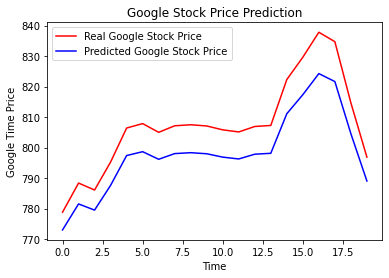

89.82406083715873


In [21]:
# Parte 3 – Hacer las predicciones y visualizar los resultados
from sklearn.metrics import mean_squared_error

# Obtener el precio real de las acciones de 2017
test_set = pd.read_csv('Google_Stock_Price_Test.csv', sep=',')
real_stock_price = test_set.iloc[:,1:2].values


# Obtener el precio de las acciones previsto para 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
     
                                             
# Visualizando los resultados                                         
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()

print(mean_squared_error(predicted_stock_price, real_stock_price))

**Actividad**: A continuación, realizad diferentes pruebas con topologías variadas y con número de entradas distintas, manipulando el conjunto de entrenamiento tanto de salida como de entrada con distintos pasos temporales. Construir una tabla con diferentes configuraciones tanto de aprendizaje como de topologías. Tomar conclusiones de dicha tabla, seleccionar la mejor opción y explicar por qué.

In [22]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv', sep=',')
real_stock_price = test_set.iloc[:,1:2].values


In [23]:

def probar_resultado(red):
    # Obtener el precio real de las acciones de 2017

    # Obtener el precio de las acciones previsto para 2017
    inputs = real_stock_price
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (20, 1, 1))
    predicted_stock_price = red.predict(inputs)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)


    # Visualizando los resultados                                         
    plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
    plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Time Price')
    plt.legend()
    plt.show()
    
    return predicted_stock_price

Epoch 1/200
40/40 [==============================] - 1s 2ms/step - loss: 0.3943
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.2386
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1507
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1065
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0868
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0792
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0761
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0745
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0731
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0718
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0704
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0690
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 2ms/step - loss: 2.7174e-04
Epoch 101/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7159e-04
Epoch 102/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7041e-04
Epoch 103/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7077e-04
Epoch 104/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7034e-04
Epoch 105/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7036e-04
Epoch 106/200
40/40 [==============================] - 0s 2ms/step - loss: 2.6948e-04
Epoch 107/200
40/40 [==============================] - 0s 2ms/step - loss: 2.6957e-04
Epoch 108/200
40/40 [==============================] - 0s 1ms/step - loss: 2.6859e-04
Epoch 109/200
40/40 [==============================] - 0s 1ms/step - loss: 2.6814e-04
Epoch 110/200
40/40 [==============================] - 0s 2ms/step - loss: 2.6911e-04
Epoch 111/200
40/40 [==============================] - 0s 1ms/step -

40/40 [==============================] - 0s 2ms/step - loss: 2.6338e-04
Epoch 196/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5277e-04
Epoch 197/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5460e-04
Epoch 198/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5517e-04
Epoch 199/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5951e-04
Epoch 200/200
40/40 [==============================] - 0s 1ms/step - loss: 2.5355e-04


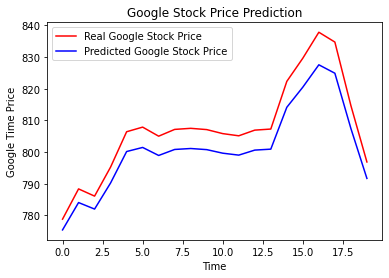

Epoch 1/200
40/40 [==============================] - 1s 1ms/step - loss: 0.0774
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0707
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0591
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 6/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0480
Epoch 7/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0425
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0372
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0323
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0190
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 2ms/step - loss: 2.5145e-04
Epoch 99/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5680e-04
Epoch 100/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5201e-04
Epoch 101/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4996e-04
Epoch 102/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5725e-04
Epoch 103/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5635e-04
Epoch 104/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5340e-04
Epoch 105/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5720e-04
Epoch 106/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5470e-04
Epoch 107/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5915e-04
Epoch 108/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5720e-04
Epoch 109/200
40/40 [==============================] - 0s 1ms/step - 

40/40 [==============================] - 0s 2ms/step - loss: 2.5272e-04
Epoch 194/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4633e-04
Epoch 195/200
40/40 [==============================] - 0s 1ms/step - loss: 2.5066e-04
Epoch 196/200
40/40 [==============================] - 0s 1ms/step - loss: 2.5713e-04
Epoch 197/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5574e-04
Epoch 198/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5350e-04
Epoch 199/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5088e-04
Epoch 200/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5639e-04


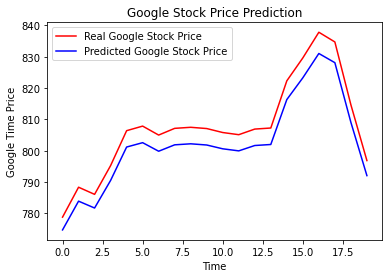

Epoch 1/200
40/40 [==============================] - 1s 1ms/step - loss: 0.1094
Epoch 2/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0694
Epoch 3/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0658
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0618
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0575
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0445
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0360
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 1ms/step - loss: 2.5607e-04
Epoch 99/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4798e-04
Epoch 100/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5483e-04
Epoch 101/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5115e-04
Epoch 102/200
40/40 [==============================] - 0s 1ms/step - loss: 2.5261e-04
Epoch 103/200
40/40 [==============================] - 0s 1ms/step - loss: 2.5622e-04
Epoch 104/200
40/40 [==============================] - 0s 1ms/step - loss: 2.5040e-04
Epoch 105/200
40/40 [==============================] - 0s 1ms/step - loss: 2.5367e-04
Epoch 106/200
40/40 [==============================] - 0s 1ms/step - loss: 2.5240e-04
Epoch 107/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5063e-04
Epoch 108/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5163e-04
Epoch 109/200
40/40 [==============================] - 0s 1ms/step - 

40/40 [==============================] - 0s 2ms/step - loss: 2.5850e-04
Epoch 194/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5191e-04
Epoch 195/200
40/40 [==============================] - 0s 2ms/step - loss: 2.6169e-04
Epoch 196/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5289e-04
Epoch 197/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5454e-04
Epoch 198/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7128e-04
Epoch 199/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5041e-04
Epoch 200/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5307e-04


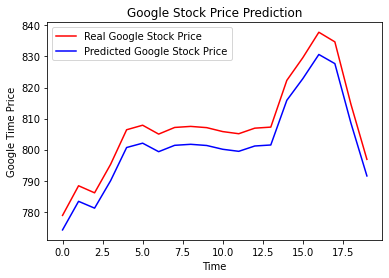

Epoch 1/200
40/40 [==============================] - 1s 4ms/step - loss: 0.0789
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0716
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0656
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0586
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0521
Epoch 6/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0462
Epoch 7/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0397
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0339
Epoch 9/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0280
Epoch 10/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0226
Epoch 11/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0176
Epoch 12/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0132
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 6ms/step - loss: 2.7185e-04
Epoch 99/200
40/40 [==============================] - 0s 7ms/step - loss: 2.6387e-04
Epoch 100/200
40/40 [==============================] - 0s 9ms/step - loss: 2.7388e-04
Epoch 101/200
40/40 [==============================] - 0s 8ms/step - loss: 2.7077e-04
Epoch 102/200
40/40 [==============================] - 0s 11ms/step - loss: 2.6288e-04
Epoch 103/200
40/40 [==============================] - 0s 9ms/step - loss: 2.5949e-04
Epoch 104/200
40/40 [==============================] - 0s 8ms/step - loss: 2.5532e-04
Epoch 105/200
40/40 [==============================] - 0s 10ms/step - loss: 2.6591e-04
Epoch 106/200
40/40 [==============================] - 0s 7ms/step - loss: 2.5465e-04
Epoch 107/200
40/40 [==============================] - 0s 7ms/step - loss: 2.5350e-04
Epoch 108/200
40/40 [==============================] - 0s 11ms/step - loss: 2.7223e-04
Epoch 109/200
40/40 [==============================] - 0s 9ms/step

40/40 [==============================] - 0s 9ms/step - loss: 2.5680e-04
Epoch 194/200
40/40 [==============================] - 0s 10ms/step - loss: 2.5863e-04
Epoch 195/200
40/40 [==============================] - 0s 11ms/step - loss: 2.5407e-04
Epoch 196/200
40/40 [==============================] - 0s 10ms/step - loss: 2.4936e-04
Epoch 197/200
40/40 [==============================] - 0s 7ms/step - loss: 2.5146e-04
Epoch 198/200
40/40 [==============================] - 0s 4ms/step - loss: 2.7126e-04
Epoch 199/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5557e-04
Epoch 200/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5455e-04


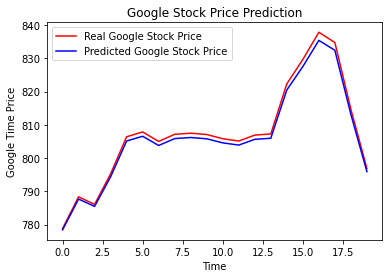

Epoch 1/200
40/40 [==============================] - 3s 3ms/step - loss: 0.1827
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0949
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0779
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0764
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0758
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0752
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0745
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0737
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0729
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0718
Epoch 11/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0709
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0697
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 2ms/step - loss: 3.0342e-04
Epoch 100/200
40/40 [==============================] - 0s 2ms/step - loss: 2.9745e-04
Epoch 101/200
40/40 [==============================] - 0s 2ms/step - loss: 2.9590e-04
Epoch 102/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9722e-04
Epoch 103/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9620e-04
Epoch 104/200
40/40 [==============================] - 0s 2ms/step - loss: 2.9603e-04
Epoch 105/200
40/40 [==============================] - 0s 2ms/step - loss: 2.9380e-04
Epoch 106/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9641e-04
Epoch 107/200
40/40 [==============================] - 0s 2ms/step - loss: 3.0183e-04
Epoch 108/200
40/40 [==============================] - 0s 2ms/step - loss: 2.9469e-04
Epoch 109/200
40/40 [==============================] - 0s 2ms/step - loss: 2.9027e-04
Epoch 110/200
40/40 [==============================] - 0s 2ms/step -

40/40 [==============================] - 0s 2ms/step - loss: 2.8215e-04
Epoch 195/200
40/40 [==============================] - 0s 2ms/step - loss: 2.8063e-04
Epoch 196/200
40/40 [==============================] - 0s 2ms/step - loss: 2.8902e-04
Epoch 197/200
40/40 [==============================] - 0s 2ms/step - loss: 2.8175e-04
Epoch 198/200
40/40 [==============================] - 0s 3ms/step - loss: 2.7955e-04
Epoch 199/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7777e-04
Epoch 200/200
40/40 [==============================] - 0s 2ms/step - loss: 2.8340e-04


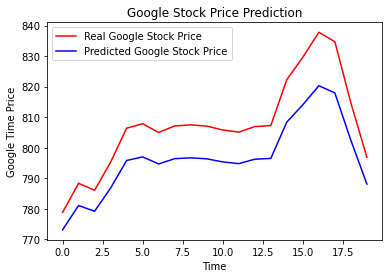

Epoch 1/200
40/40 [==============================] - 2s 2ms/step - loss: 0.2628
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0898
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0796
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0786
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0779
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0771
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0762
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0753
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0743
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0731
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0718
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0706
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 2ms/step - loss: 2.6758e-04
Epoch 100/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7472e-04
Epoch 101/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7614e-04
Epoch 102/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7595e-04
Epoch 103/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7291e-04
Epoch 104/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7332e-04
Epoch 105/200
40/40 [==============================] - 0s 2ms/step - loss: 2.6738e-04
Epoch 106/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7327e-04
Epoch 107/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7502e-04
Epoch 108/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7138e-04
Epoch 109/200
40/40 [==============================] - 0s 2ms/step - loss: 2.6401e-04
Epoch 110/200
40/40 [==============================] - 0s 3ms/step -

40/40 [==============================] - 0s 2ms/step - loss: 2.6820e-04
Epoch 195/200
40/40 [==============================] - 0s 2ms/step - loss: 2.8865e-04
Epoch 196/200
40/40 [==============================] - 0s 2ms/step - loss: 2.6995e-04
Epoch 197/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7388e-04
Epoch 198/200
40/40 [==============================] - 0s 2ms/step - loss: 2.6348e-04
Epoch 199/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5845e-04
Epoch 200/200
40/40 [==============================] - 0s 2ms/step - loss: 2.9816e-04


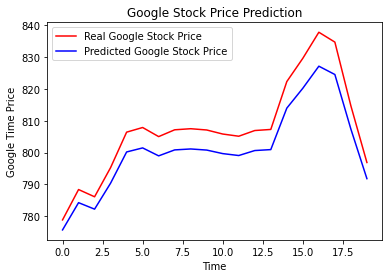

Epoch 1/200
40/40 [==============================] - 1s 2ms/step - loss: 0.0922
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0787
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0779
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0768
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0756
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0741
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0718
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0693
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 11/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0570
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0515
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 2ms/step - loss: 2.8536e-04
Epoch 99/200
40/40 [==============================] - 0s 3ms/step - loss: 2.7632e-04
Epoch 100/200
40/40 [==============================] - 0s 2ms/step - loss: 2.6901e-04
Epoch 101/200
40/40 [==============================] - 0s 3ms/step - loss: 2.7269e-04
Epoch 102/200
40/40 [==============================] - 0s 4ms/step - loss: 2.8044e-04
Epoch 103/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8653e-04
Epoch 104/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9188e-04
Epoch 105/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7221e-04
Epoch 106/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7563e-04
Epoch 107/200
40/40 [==============================] - 0s 2ms/step - loss: 3.3064e-04
Epoch 108/200
40/40 [==============================] - 0s 2ms/step - loss: 2.9134e-04
Epoch 109/200
40/40 [==============================] - 0s 2ms/step - 

40/40 [==============================] - 0s 3ms/step - loss: 2.6447e-04
Epoch 194/200
40/40 [==============================] - 0s 3ms/step - loss: 2.6078e-04
Epoch 195/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8517e-04
Epoch 196/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7502e-04
Epoch 197/200
40/40 [==============================] - 0s 3ms/step - loss: 2.6715e-04
Epoch 198/200
40/40 [==============================] - 0s 2ms/step - loss: 2.9154e-04
Epoch 199/200
40/40 [==============================] - 0s 2ms/step - loss: 3.0609e-04
Epoch 200/200
40/40 [==============================] - 0s 2ms/step - loss: 2.6099e-04


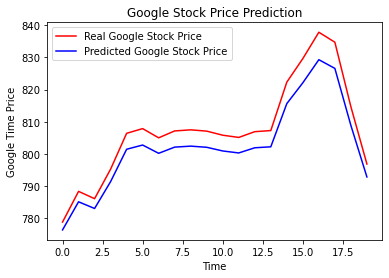

Epoch 1/200
40/40 [==============================] - 3s 5ms/step - loss: 0.2457
Epoch 2/200
40/40 [==============================] - 0s 10ms/step - loss: 0.0797
Epoch 3/200
40/40 [==============================] - 0s 11ms/step - loss: 0.0778
Epoch 4/200
40/40 [==============================] - 0s 9ms/step - loss: 0.0765
Epoch 5/200
40/40 [==============================] - 1s 13ms/step - loss: 0.0754
Epoch 6/200
40/40 [==============================] - 1s 14ms/step - loss: 0.0737
Epoch 7/200
40/40 [==============================] - 1s 14ms/step - loss: 0.0723
Epoch 8/200
40/40 [==============================] - 0s 9ms/step - loss: 0.0702
Epoch 9/200
40/40 [==============================] - 0s 8ms/step - loss: 0.0681
Epoch 10/200
40/40 [==============================] - 0s 8ms/step - loss: 0.0660
Epoch 11/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0634
Epoch 12/200
40/40 [==============================] - 0s 9ms/step - loss: 0.0606
Epoch 13/200
40/40 [============

40/40 [==============================] - 0s 12ms/step - loss: 2.7555e-04
Epoch 99/200
40/40 [==============================] - 0s 11ms/step - loss: 2.8149e-04
Epoch 100/200
40/40 [==============================] - 1s 14ms/step - loss: 2.8717e-04
Epoch 101/200
40/40 [==============================] - 0s 10ms/step - loss: 2.7286e-04
Epoch 102/200
40/40 [==============================] - 1s 13ms/step - loss: 2.7440e-04
Epoch 103/200
40/40 [==============================] - 1s 13ms/step - loss: 2.9359e-04
Epoch 104/200
40/40 [==============================] - 1s 14ms/step - loss: 2.7542e-04
Epoch 105/200
40/40 [==============================] - 1s 14ms/step - loss: 2.6946e-04
Epoch 106/200
40/40 [==============================] - 1s 12ms/step - loss: 2.7738e-04
Epoch 107/200
40/40 [==============================] - 0s 11ms/step - loss: 2.6701e-04
Epoch 108/200
40/40 [==============================] - 0s 10ms/step - loss: 2.7202e-04
Epoch 109/200
40/40 [==============================] - 0s 

Epoch 193/200
40/40 [==============================] - 0s 7ms/step - loss: 2.8191e-04
Epoch 194/200
40/40 [==============================] - 0s 7ms/step - loss: 2.5865e-04
Epoch 195/200
40/40 [==============================] - 0s 7ms/step - loss: 2.8361e-04
Epoch 196/200
40/40 [==============================] - 0s 8ms/step - loss: 3.0776e-04
Epoch 197/200
40/40 [==============================] - 0s 7ms/step - loss: 3.2218e-04
Epoch 198/200
40/40 [==============================] - 0s 6ms/step - loss: 2.8108e-04
Epoch 199/200
40/40 [==============================] - 0s 6ms/step - loss: 2.8835e-04
Epoch 200/200
40/40 [==============================] - 0s 7ms/step - loss: 3.1004e-04


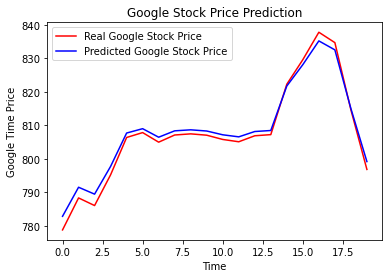

Epoch 1/200
40/40 [==============================] - 3s 3ms/step - loss: 0.0809
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0798
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0796
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0795
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0799
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0793
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0790
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0788
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0783
Epoch 11/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0777
Epoch 12/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0773
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 2ms/step - loss: 3.2708e-04
Epoch 99/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2705e-04
Epoch 100/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2635e-04
Epoch 101/200
40/40 [==============================] - 0s 2ms/step - loss: 3.4150e-04
Epoch 102/200
40/40 [==============================] - 0s 2ms/step - loss: 3.3951e-04
Epoch 103/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2776e-04
Epoch 104/200
40/40 [==============================] - 0s 2ms/step - loss: 3.3460e-04
Epoch 105/200
40/40 [==============================] - 0s 3ms/step - loss: 3.2823e-04
Epoch 106/200
40/40 [==============================] - 0s 3ms/step - loss: 3.2607e-04
Epoch 107/200
40/40 [==============================] - 0s 2ms/step - loss: 3.3004e-04
Epoch 108/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2888e-04
Epoch 109/200
40/40 [==============================] - 0s 2ms/step - 

40/40 [==============================] - 0s 3ms/step - loss: 3.0992e-04
Epoch 194/200
40/40 [==============================] - 0s 3ms/step - loss: 3.0684e-04
Epoch 195/200
40/40 [==============================] - 0s 2ms/step - loss: 3.2198e-04
Epoch 196/200
40/40 [==============================] - 0s 3ms/step - loss: 3.1169e-04
Epoch 197/200
40/40 [==============================] - 0s 2ms/step - loss: 3.0833e-04
Epoch 198/200
40/40 [==============================] - 0s 2ms/step - loss: 3.1114e-04
Epoch 199/200
40/40 [==============================] - 0s 2ms/step - loss: 3.0735e-04
Epoch 200/200
40/40 [==============================] - 0s 3ms/step - loss: 3.1200e-04


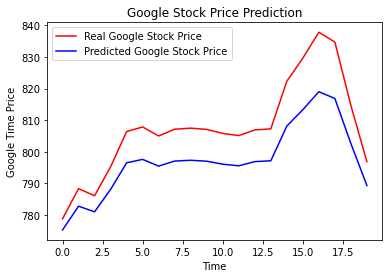

Epoch 1/200
40/40 [==============================] - 2s 2ms/step - loss: 0.0804
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0798
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0804
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0800
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0796
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0793
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0792
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0788
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0785
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0779
Epoch 11/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0765
Epoch 12/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0750
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 4ms/step - loss: 2.9193e-04
Epoch 99/200
40/40 [==============================] - 0s 3ms/step - loss: 3.0014e-04
Epoch 100/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9821e-04
Epoch 101/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9261e-04
Epoch 102/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9006e-04
Epoch 103/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9583e-04
Epoch 104/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9192e-04
Epoch 105/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8181e-04
Epoch 106/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8765e-04
Epoch 107/200
40/40 [==============================] - 0s 2ms/step - loss: 2.9166e-04
Epoch 108/200
40/40 [==============================] - 0s 2ms/step - loss: 2.9837e-04
Epoch 109/200
40/40 [==============================] - 0s 2ms/step - 

40/40 [==============================] - 0s 3ms/step - loss: 3.1186e-04
Epoch 194/200
40/40 [==============================] - 0s 2ms/step - loss: 2.8247e-04
Epoch 195/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8422e-04
Epoch 196/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7680e-04
Epoch 197/200
40/40 [==============================] - 0s 2ms/step - loss: 3.0878e-04
Epoch 198/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9985e-04
Epoch 199/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9334e-04
Epoch 200/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8497e-04


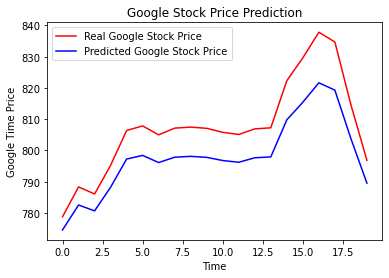

Epoch 1/200
40/40 [==============================] - 4s 3ms/step - loss: 0.0822
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0804
Epoch 3/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0802
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0800
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0798
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0794
Epoch 7/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0795
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0791
Epoch 9/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0786
Epoch 10/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0778
Epoch 11/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0766
Epoch 12/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0740
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 3ms/step - loss: 3.0487e-04
Epoch 99/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9360e-04
Epoch 100/200
40/40 [==============================] - 0s 3ms/step - loss: 3.0862e-04
Epoch 101/200
40/40 [==============================] - 0s 3ms/step - loss: 3.0391e-04
Epoch 102/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9999e-04
Epoch 103/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9697e-04
Epoch 104/200
40/40 [==============================] - 0s 3ms/step - loss: 3.0480e-04
Epoch 105/200
40/40 [==============================] - 0s 4ms/step - loss: 2.9179e-04
Epoch 106/200
40/40 [==============================] - 0s 4ms/step - loss: 2.9306e-04
Epoch 107/200
40/40 [==============================] - 0s 5ms/step - loss: 2.9105e-04
Epoch 108/200
40/40 [==============================] - 0s 4ms/step - loss: 3.0531e-04
Epoch 109/200
40/40 [==============================] - 0s 4ms/step - 

40/40 [==============================] - 0s 3ms/step - loss: 2.8469e-04
Epoch 194/200
40/40 [==============================] - 0s 4ms/step - loss: 2.7999e-04
Epoch 195/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8664e-04
Epoch 196/200
40/40 [==============================] - 0s 3ms/step - loss: 3.0444e-04
Epoch 197/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9077e-04
Epoch 198/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9276e-04
Epoch 199/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9343e-04
Epoch 200/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8781e-04


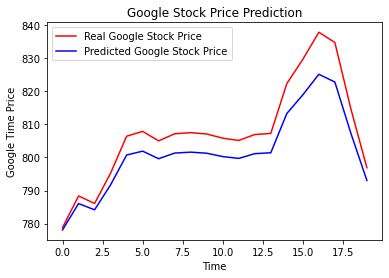

Epoch 1/200
40/40 [==============================] - 3s 3ms/step - loss: 0.0806
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0800
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0795
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0796
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0796
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0784
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0772
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0754
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0719
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0659
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 12/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0397
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 3ms/step - loss: 2.8936e-04
Epoch 99/200
40/40 [==============================] - 0s 3ms/step - loss: 2.6940e-04
Epoch 100/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9188e-04
Epoch 101/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9189e-04
Epoch 102/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8541e-04
Epoch 103/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8528e-04
Epoch 104/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8533e-04
Epoch 105/200
40/40 [==============================] - 0s 3ms/step - loss: 2.7638e-04
Epoch 106/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8106e-04
Epoch 107/200
40/40 [==============================] - 0s 3ms/step - loss: 2.6889e-04
Epoch 108/200
40/40 [==============================] - 0s 3ms/step - loss: 2.7998e-04
Epoch 109/200
40/40 [==============================] - 0s 3ms/step - 

40/40 [==============================] - 0s 3ms/step - loss: 3.1157e-04
Epoch 194/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9935e-04
Epoch 195/200
40/40 [==============================] - 0s 2ms/step - loss: 3.4999e-04
Epoch 196/200
40/40 [==============================] - 0s 2ms/step - loss: 3.3395e-04
Epoch 197/200
40/40 [==============================] - 0s 2ms/step - loss: 2.8253e-04
Epoch 198/200
40/40 [==============================] - 0s 2ms/step - loss: 2.9647e-04
Epoch 199/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8060e-04
Epoch 200/200
40/40 [==============================] - 0s 3ms/step - loss: 2.7533e-04


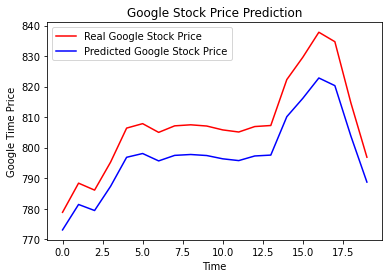

Epoch 1/200
40/40 [==============================] - 3s 3ms/step - loss: 0.1613
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0805
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0794
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0791
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0788
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0783
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0781
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0771
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0758
Epoch 11/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0747
Epoch 12/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0731
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 3ms/step - loss: 3.0217e-04
Epoch 99/200
40/40 [==============================] - 0s 4ms/step - loss: 2.8312e-04
Epoch 100/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9976e-04
Epoch 101/200
40/40 [==============================] - 0s 4ms/step - loss: 3.0614e-04
Epoch 102/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9031e-04
Epoch 103/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8152e-04
Epoch 104/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9463e-04
Epoch 105/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9062e-04
Epoch 106/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9647e-04
Epoch 107/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9095e-04
Epoch 108/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8301e-04
Epoch 109/200
40/40 [==============================] - 0s 3ms/step - 

40/40 [==============================] - 0s 3ms/step - loss: 2.9144e-04
Epoch 194/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9154e-04
Epoch 195/200
40/40 [==============================] - 0s 3ms/step - loss: 2.9024e-04
Epoch 196/200
40/40 [==============================] - 0s 3ms/step - loss: 3.0880e-04
Epoch 197/200
40/40 [==============================] - 0s 3ms/step - loss: 3.3736e-04
Epoch 198/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8560e-04
Epoch 199/200
40/40 [==============================] - 0s 3ms/step - loss: 3.0106e-04
Epoch 200/200
40/40 [==============================] - 0s 3ms/step - loss: 2.8430e-04


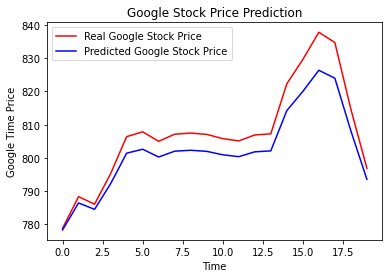

Epoch 1/200
40/40 [==============================] - 2s 5ms/step - loss: 0.1914
Epoch 2/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0809
Epoch 3/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0797
Epoch 4/200
40/40 [==============================] - 0s 8ms/step - loss: 0.0791
Epoch 5/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0792
Epoch 6/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0786
Epoch 7/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0781
Epoch 8/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0775
Epoch 9/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0770
Epoch 10/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0756
Epoch 11/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0742
Epoch 12/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0725
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 9ms/step - loss: 2.9737e-04
Epoch 99/200
40/40 [==============================] - 0s 9ms/step - loss: 2.9926e-04
Epoch 100/200
40/40 [==============================] - 0s 10ms/step - loss: 3.2987e-04
Epoch 101/200
40/40 [==============================] - 0s 9ms/step - loss: 2.9269e-04
Epoch 102/200
40/40 [==============================] - 0s 9ms/step - loss: 3.0044e-04
Epoch 103/200
40/40 [==============================] - 0s 9ms/step - loss: 2.9242e-04
Epoch 104/200
40/40 [==============================] - 0s 9ms/step - loss: 2.9060e-04
Epoch 105/200
40/40 [==============================] - 0s 8ms/step - loss: 2.8963e-04
Epoch 106/200
40/40 [==============================] - 0s 8ms/step - loss: 2.8416e-04
Epoch 107/200
40/40 [==============================] - 0s 10ms/step - loss: 2.9328e-04
Epoch 108/200
40/40 [==============================] - 0s 9ms/step - loss: 2.9320e-04
Epoch 109/200
40/40 [==============================] - 0s 9ms/step 

40/40 [==============================] - 0s 10ms/step - loss: 2.8235e-04
Epoch 193/200
40/40 [==============================] - 0s 9ms/step - loss: 2.8370e-04
Epoch 194/200
40/40 [==============================] - 0s 9ms/step - loss: 3.0433e-04
Epoch 195/200
40/40 [==============================] - 0s 10ms/step - loss: 2.8076e-04
Epoch 196/200
40/40 [==============================] - 0s 11ms/step - loss: 2.8964e-04
Epoch 197/200
40/40 [==============================] - 0s 10ms/step - loss: 2.8712e-04
Epoch 198/200
40/40 [==============================] - 0s 11ms/step - loss: 2.9390e-04
Epoch 199/200
40/40 [==============================] - 0s 9ms/step - loss: 2.8283e-04
Epoch 200/200
40/40 [==============================] - 0s 10ms/step - loss: 2.8651e-04


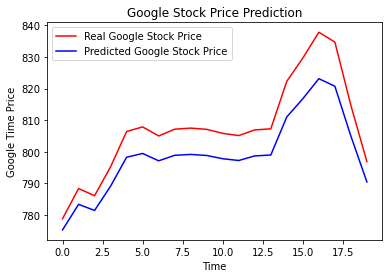

Epoch 1/200
40/40 [==============================] - 3s 6ms/step - loss: 0.0834
Epoch 2/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0799
Epoch 3/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0799
Epoch 4/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0797
Epoch 5/200
40/40 [==============================] - 0s 8ms/step - loss: 0.0796
Epoch 6/200
40/40 [==============================] - 0s 9ms/step - loss: 0.0803
Epoch 7/200
40/40 [==============================] - 0s 10ms/step - loss: 0.0794
Epoch 8/200
40/40 [==============================] - 0s 10ms/step - loss: 0.0764
Epoch 9/200
40/40 [==============================] - 0s 9ms/step - loss: 0.0746
Epoch 10/200
40/40 [==============================] - 0s 9ms/step - loss: 0.0680
Epoch 11/200
40/40 [==============================] - 0s 9ms/step - loss: 0.0543
Epoch 12/200
40/40 [==============================] - 0s 10ms/step - loss: 0.0334
Epoch 13/200
40/40 [==============

40/40 [==============================] - 0s 11ms/step - loss: 2.7405e-04
Epoch 98/200
40/40 [==============================] - 0s 11ms/step - loss: 2.7146e-04
Epoch 99/200
40/40 [==============================] - 0s 11ms/step - loss: 2.7453e-04
Epoch 100/200
40/40 [==============================] - 0s 11ms/step - loss: 2.8210e-04
Epoch 101/200
40/40 [==============================] - 0s 10ms/step - loss: 2.9451e-04
Epoch 102/200
40/40 [==============================] - 0s 10ms/step - loss: 2.7737e-04
Epoch 103/200
40/40 [==============================] - 0s 11ms/step - loss: 2.6885e-04
Epoch 104/200
40/40 [==============================] - 0s 10ms/step - loss: 2.8679e-04
Epoch 105/200
40/40 [==============================] - 0s 8ms/step - loss: 2.8272e-04
Epoch 106/200
40/40 [==============================] - 0s 8ms/step - loss: 2.7999e-04
Epoch 107/200
40/40 [==============================] - 0s 9ms/step - loss: 2.7861e-04
Epoch 108/200
40/40 [==============================] - 0s 10ms

40/40 [==============================] - 0s 8ms/step - loss: 2.6828e-04
Epoch 192/200
40/40 [==============================] - 0s 9ms/step - loss: 2.7552e-04
Epoch 193/200
40/40 [==============================] - 0s 9ms/step - loss: 2.8303e-04
Epoch 194/200
40/40 [==============================] - 0s 10ms/step - loss: 2.6962e-04
Epoch 195/200
40/40 [==============================] - 0s 10ms/step - loss: 2.6490e-04
Epoch 196/200
40/40 [==============================] - 0s 10ms/step - loss: 2.7463e-04
Epoch 197/200
40/40 [==============================] - 0s 9ms/step - loss: 2.7807e-04
Epoch 198/200
40/40 [==============================] - 0s 9ms/step - loss: 3.0688e-04
Epoch 199/200
40/40 [==============================] - 0s 10ms/step - loss: 2.7950e-04
Epoch 200/200
40/40 [==============================] - 1s 13ms/step - loss: 2.6608e-04


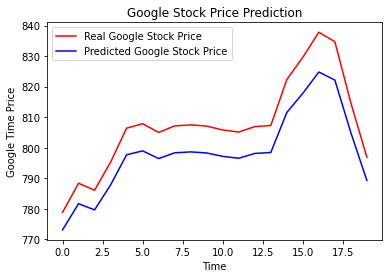

Epoch 1/200
40/40 [==============================] - 2s 6ms/step - loss: 0.1426
Epoch 2/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0797
Epoch 3/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0796
Epoch 4/200
40/40 [==============================] - 0s 8ms/step - loss: 0.0797
Epoch 5/200
40/40 [==============================] - 0s 9ms/step - loss: 0.0792
Epoch 6/200
40/40 [==============================] - 0s 10ms/step - loss: 0.0788
Epoch 7/200
40/40 [==============================] - 0s 11ms/step - loss: 0.0788
Epoch 8/200
40/40 [==============================] - 0s 9ms/step - loss: 0.0772
Epoch 9/200
40/40 [==============================] - 0s 10ms/step - loss: 0.0756
Epoch 10/200
40/40 [==============================] - 0s 11ms/step - loss: 0.0738
Epoch 11/200
40/40 [==============================] - 0s 10ms/step - loss: 0.0697
Epoch 12/200
40/40 [==============================] - 0s 9ms/step - loss: 0.0640
Epoch 13/200
40/40 [============

40/40 [==============================] - 0s 11ms/step - loss: 2.8768e-04
Epoch 98/200
40/40 [==============================] - 0s 11ms/step - loss: 2.8012e-04
Epoch 99/200
40/40 [==============================] - 0s 10ms/step - loss: 2.8356e-04
Epoch 100/200
40/40 [==============================] - 0s 11ms/step - loss: 2.7830e-04
Epoch 101/200
40/40 [==============================] - 0s 10ms/step - loss: 2.7270e-04
Epoch 102/200
40/40 [==============================] - 0s 10ms/step - loss: 2.9034e-04
Epoch 103/200
40/40 [==============================] - 0s 10ms/step - loss: 2.9019e-04
Epoch 104/200
40/40 [==============================] - 0s 10ms/step - loss: 2.8259e-04
Epoch 105/200
40/40 [==============================] - 0s 9ms/step - loss: 2.8320e-04
Epoch 106/200
40/40 [==============================] - 0s 12ms/step - loss: 2.7815e-04
Epoch 107/200
40/40 [==============================] - 0s 11ms/step - loss: 3.0881e-04
Epoch 108/200
40/40 [==============================] - 0s 10

40/40 [==============================] - 0s 11ms/step - loss: 3.0566e-04
Epoch 192/200
40/40 [==============================] - 0s 9ms/step - loss: 3.0168e-04
Epoch 193/200
40/40 [==============================] - 0s 10ms/step - loss: 2.9889e-04
Epoch 194/200
40/40 [==============================] - 0s 9ms/step - loss: 2.9214e-04
Epoch 195/200
40/40 [==============================] - 0s 8ms/step - loss: 2.8767e-04
Epoch 196/200
40/40 [==============================] - 0s 8ms/step - loss: 3.3185e-04
Epoch 197/200
40/40 [==============================] - 0s 9ms/step - loss: 3.3072e-04
Epoch 198/200
40/40 [==============================] - 0s 10ms/step - loss: 3.0047e-04
Epoch 199/200
40/40 [==============================] - 0s 10ms/step - loss: 2.9224e-04
Epoch 200/200
40/40 [==============================] - 0s 10ms/step - loss: 2.7963e-04


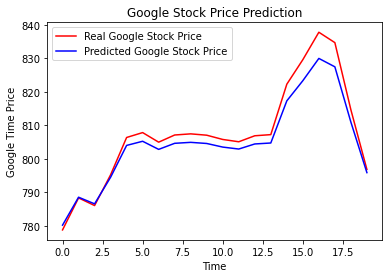

In [24]:
resultados_comparacion = pd.DataFrame({"NumCapas": [], "NumNeuronas": [], "MSE": []})

for neuronas in range(10, 50, 10):
    regressor = Sequential()

    # Añadimos una capa de entrada y la capa LSTM

    regressor.add(LSTM(units = neuronas, activation = 'sigmoid', input_shape = (None, 1)))

    # Añadimos la capa de salida con una única neurona

    regressor.add(Dense(units = 1))

    # Compilamos la RNN
    # usamos el error cuadrático medio
    # MSE para la regresión

    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Ajustamos la RNN al conjunto de entrenamiento

    regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

    prediccion = probar_resultado(regressor)
    
    resultados_comparacion.loc[len(resultados_comparacion)] = [1, neuronas, mean_squared_error(prediccion, real_stock_price)]
    

    
for neuronas in range(10, 50, 10):
    regressor = Sequential()

    # Añadimos una capa de entrada y la capa LSTM

    regressor.add(LSTM(units = neuronas, activation = 'sigmoid', input_shape = (None, 1), return_sequences = True))
    regressor.add(LSTM(units = neuronas, activation = 'sigmoid'))

    # Añadimos la capa de salida con una única neurona

    regressor.add(Dense(units = 1))

    # Compilamos la RNN
    # usamos el error cuadrático medio
    # MSE para la regresión

    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Ajustamos la RNN al conjunto de entrenamiento

    regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

    prediccion = probar_resultado(regressor)
    
    resultados_comparacion.loc[len(resultados_comparacion)] = [2, neuronas, mean_squared_error(prediccion, real_stock_price)]
    
for neuronas in range(10, 50, 5):
    regressor = Sequential()

    # Añadimos una capa de entrada y la capa LSTM

    regressor.add(LSTM(units = neuronas, activation = 'sigmoid', input_shape = (None, 1), return_sequences = True))
    regressor.add(LSTM(units = neuronas, activation = 'sigmoid', return_sequences = True))
    regressor.add(LSTM(units = neuronas, activation = 'sigmoid'))

    # Añadimos la capa de salida con una única neurona

    regressor.add(Dense(units = 1))

    # Compilamos la RNN
    # usamos el error cuadrático medio
    # MSE para la regresión

    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Ajustamos la RNN al conjunto de entrenamiento

    regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

    prediccion = probar_resultado(regressor)
    
    resultados_comparacion.loc[len(resultados_comparacion)] = [3, neuronas, mean_squared_error(prediccion, real_stock_price)]

In [25]:
print(resultados_comparacion)

    NumCapas  NumNeuronas         MSE
0        1.0         10.0   44.862521
1        1.0         20.0   28.574889
2        1.0         30.0   34.016141
3        1.0         40.0    2.017673
4        2.0         10.0  129.054681
5        2.0         20.0   45.624783
6        2.0         30.0   28.917823
7        2.0         40.0    4.057304
8        3.0         10.0  122.434435
9        3.0         15.0  100.025874
10       3.0         20.0   45.912519
11       3.0         25.0  102.788701
12       3.0         30.0   36.193373
13       3.0         35.0   80.157307
14       3.0         40.0   83.845142
15       3.0         45.0   12.615369


En este caso la mejor configuración ha sido la configuración con una única capa oculta, y con un número alto de neuronas (40). 

Epoch 1/200
40/40 [==============================] - 1s 1ms/step - loss: 0.7351
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.2643
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1014
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0640
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0578
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0540
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0522
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0501
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0460
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0438
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 1ms/step - loss: 2.4820e-04
Epoch 100/200
40/40 [==============================] - 0s 1ms/step - loss: 2.4987e-04
Epoch 101/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4668e-04
Epoch 102/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4742e-04
Epoch 103/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4824e-04
Epoch 104/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4764e-04
Epoch 105/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4679e-04
Epoch 106/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4887e-04
Epoch 107/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4645e-04
Epoch 108/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4693e-04
Epoch 109/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4732e-04
Epoch 110/200
40/40 [==============================] - 0s 2ms/step -

40/40 [==============================] - 0s 2ms/step - loss: 2.6406e-04
Epoch 195/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5393e-04
Epoch 196/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5979e-04
Epoch 197/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4970e-04
Epoch 198/200
40/40 [==============================] - 0s 1ms/step - loss: 2.5196e-04
Epoch 199/200
40/40 [==============================] - 0s 1ms/step - loss: 2.5524e-04
Epoch 200/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5391e-04


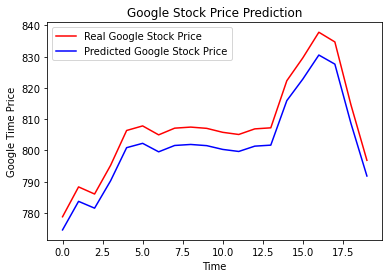

Epoch 1/200
40/40 [==============================] - 2s 2ms/step - loss: 0.2282
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0786
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0641
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0607
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0537
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0501
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0463
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0427
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0355
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 2ms/step - loss: 2.5004e-04
Epoch 99/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4699e-04
Epoch 100/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4932e-04
Epoch 101/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4720e-04
Epoch 102/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5863e-04
Epoch 103/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4832e-04
Epoch 104/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5101e-04
Epoch 105/200
40/40 [==============================] - 0s 1ms/step - loss: 2.4795e-04
Epoch 106/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4845e-04
Epoch 107/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4910e-04
Epoch 108/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5099e-04
Epoch 109/200
40/40 [==============================] - 0s 2ms/step - 

40/40 [==============================] - 0s 2ms/step - loss: 2.5373e-04
Epoch 194/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5156e-04
Epoch 195/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5294e-04
Epoch 196/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5658e-04
Epoch 197/200
40/40 [==============================] - 0s 2ms/step - loss: 2.6148e-04
Epoch 198/200
40/40 [==============================] - 0s 2ms/step - loss: 2.8022e-04
Epoch 199/200
40/40 [==============================] - 0s 2ms/step - loss: 2.6984e-04
Epoch 200/200
40/40 [==============================] - 0s 2ms/step - loss: 2.6336e-04


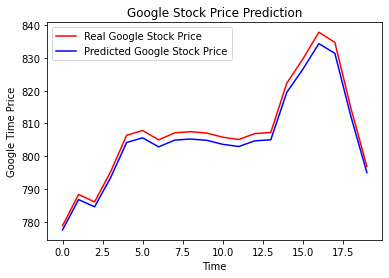

Epoch 1/200
40/40 [==============================] - 1s 4ms/step - loss: 0.1506
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0728
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0694
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0659
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0624
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0588
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0549
Epoch 8/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0511
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0433
Epoch 11/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0393
Epoch 12/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0354
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 5ms/step - loss: 2.5087e-04
Epoch 99/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5459e-04
Epoch 100/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5428e-04
Epoch 101/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5649e-04
Epoch 102/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5496e-04
Epoch 103/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5021e-04
Epoch 104/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5751e-04
Epoch 105/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5240e-04
Epoch 106/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5176e-04
Epoch 107/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5475e-04
Epoch 108/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6320e-04
Epoch 109/200
40/40 [==============================] - 0s 5ms/step - 

40/40 [==============================] - 0s 5ms/step - loss: 2.7019e-04
Epoch 194/200
40/40 [==============================] - 0s 5ms/step - loss: 2.7924e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6317e-04
Epoch 196/200
40/40 [==============================] - 0s 4ms/step - loss: 2.6683e-04
Epoch 197/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6311e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6002e-04
Epoch 199/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6141e-04
Epoch 200/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5362e-04


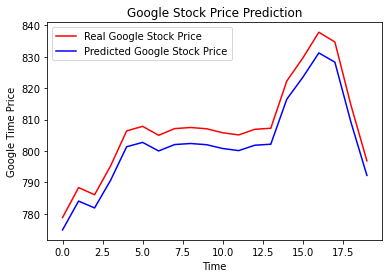

Epoch 1/200
40/40 [==============================] - 1s 4ms/step - loss: 1.4389
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.6186
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 0.2419
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 0.1031
Epoch 5/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0632
Epoch 6/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0538
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0511
Epoch 8/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0495
Epoch 9/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0480
Epoch 10/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 11/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0448
Epoch 12/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0431
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 5ms/step - loss: 2.4839e-04
Epoch 100/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4693e-04
Epoch 101/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4736e-04
Epoch 102/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4785e-04
Epoch 103/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4936e-04
Epoch 104/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4699e-04
Epoch 105/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4878e-04
Epoch 106/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4694e-04
Epoch 107/200
40/40 [==============================] - 0s 6ms/step - loss: 2.4821e-04
Epoch 108/200
40/40 [==============================] - 0s 7ms/step - loss: 2.4878e-04
Epoch 109/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4734e-04
Epoch 110/200
40/40 [==============================] - 0s 5ms/step -

40/40 [==============================] - 0s 5ms/step - loss: 2.5229e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5100e-04
Epoch 196/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5261e-04
Epoch 197/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5700e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5069e-04
Epoch 199/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5025e-04
Epoch 200/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5271e-04


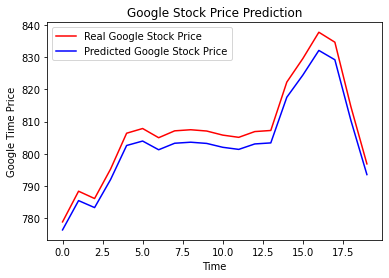

Epoch 1/200
40/40 [==============================] - 1s 3ms/step - loss: 1.1076
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4348
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 0.1642
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0828
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0645
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0610
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0592
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0577
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0559
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0542
Epoch 11/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0524
Epoch 12/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 4ms/step - loss: 2.4904e-04
Epoch 100/200
40/40 [==============================] - 0s 4ms/step - loss: 2.4779e-04
Epoch 101/200
40/40 [==============================] - 0s 4ms/step - loss: 2.4789e-04
Epoch 102/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5060e-04
Epoch 103/200
40/40 [==============================] - 0s 4ms/step - loss: 2.4912e-04
Epoch 104/200
40/40 [==============================] - 0s 4ms/step - loss: 2.4715e-04
Epoch 105/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5013e-04
Epoch 106/200
40/40 [==============================] - 0s 4ms/step - loss: 2.4966e-04
Epoch 107/200
40/40 [==============================] - 0s 4ms/step - loss: 2.4822e-04
Epoch 108/200
40/40 [==============================] - 0s 4ms/step - loss: 2.4864e-04
Epoch 109/200
40/40 [==============================] - 0s 4ms/step - loss: 2.4766e-04
Epoch 110/200
40/40 [==============================] - 0s 5ms/step -

40/40 [==============================] - 0s 6ms/step - loss: 2.6026e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6647e-04
Epoch 196/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5271e-04
Epoch 197/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5601e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5930e-04
Epoch 199/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4851e-04
Epoch 200/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5219e-04


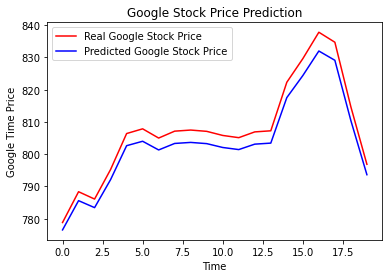

Epoch 1/200
40/40 [==============================] - 1s 3ms/step - loss: 0.7503
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.2337
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0879
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0630
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0593
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0573
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0552
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0530
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 11/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0458
Epoch 12/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0434
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 5ms/step - loss: 2.4738e-04
Epoch 100/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4654e-04
Epoch 101/200
40/40 [==============================] - 0s 4ms/step - loss: 2.4691e-04
Epoch 102/200
40/40 [==============================] - 0s 6ms/step - loss: 2.4654e-04
Epoch 103/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4609e-04
Epoch 104/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4625e-04
Epoch 105/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4811e-04
Epoch 106/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5033e-04
Epoch 107/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4647e-04
Epoch 108/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4596e-04
Epoch 109/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4557e-04
Epoch 110/200
40/40 [==============================] - 0s 5ms/step -

40/40 [==============================] - 0s 5ms/step - loss: 2.6663e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5244e-04
Epoch 196/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5914e-04
Epoch 197/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6649e-04
Epoch 198/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5054e-04
Epoch 199/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5779e-04
Epoch 200/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4572e-04


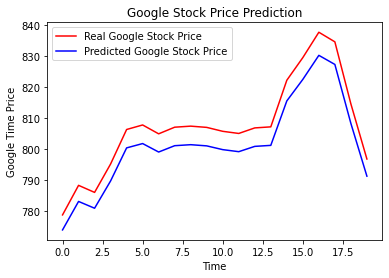

Epoch 1/200
40/40 [==============================] - 1s 4ms/step - loss: 0.0814
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0727
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0665
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0601
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0541
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0420
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0366
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0307
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0257
Epoch 11/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0207
Epoch 12/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0164
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 5ms/step - loss: 2.6175e-04
Epoch 99/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6256e-04
Epoch 100/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4829e-04
Epoch 101/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5552e-04
Epoch 102/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5629e-04
Epoch 103/200
40/40 [==============================] - 0s 5ms/step - loss: 2.8414e-04
Epoch 104/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5454e-04
Epoch 105/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5954e-04
Epoch 106/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5168e-04
Epoch 107/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4751e-04
Epoch 108/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5287e-04
Epoch 109/200
40/40 [==============================] - 0s 5ms/step - 

40/40 [==============================] - 0s 5ms/step - loss: 2.5087e-04
Epoch 194/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5402e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5303e-04
Epoch 196/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5530e-04
Epoch 197/200
40/40 [==============================] - 0s 6ms/step - loss: 2.6998e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 2.7263e-04
Epoch 199/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5084e-04
Epoch 200/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5008e-04


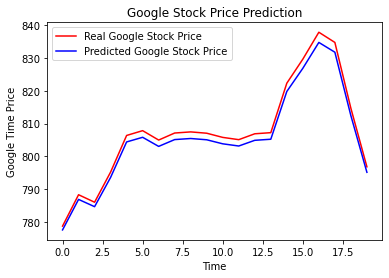

Epoch 1/200
40/40 [==============================] - 1s 4ms/step - loss: 0.2704
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0770
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0653
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0622
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0589
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0554
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0518
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0447
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0410
Epoch 11/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0375
Epoch 12/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0340
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 5ms/step - loss: 2.5427e-04
Epoch 99/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5274e-04
Epoch 100/200
40/40 [==============================] - 0s 4ms/step - loss: 2.4817e-04
Epoch 101/200
40/40 [==============================] - 0s 4ms/step - loss: 2.4872e-04
Epoch 102/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5231e-04
Epoch 103/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5214e-04
Epoch 104/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5062e-04
Epoch 105/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4658e-04
Epoch 106/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5021e-04
Epoch 107/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4991e-04
Epoch 108/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6353e-04
Epoch 109/200
40/40 [==============================] - 0s 4ms/step - 

40/40 [==============================] - 0s 5ms/step - loss: 2.6590e-04
Epoch 194/200
40/40 [==============================] - 0s 5ms/step - loss: 2.7278e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6238e-04
Epoch 196/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5629e-04
Epoch 197/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6577e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6108e-04
Epoch 199/200
40/40 [==============================] - 0s 4ms/step - loss: 2.6615e-04
Epoch 200/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5664e-04


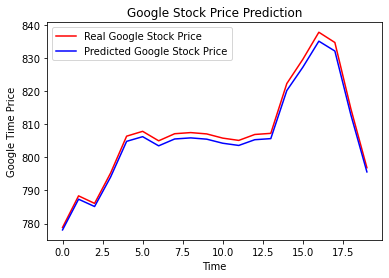

Epoch 1/200
40/40 [==============================] - 1s 3ms/step - loss: 0.1586
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0689
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0645
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0601
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0554
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0507
Epoch 7/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0461
Epoch 8/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0414
Epoch 9/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0369
Epoch 10/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0326
Epoch 11/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0286
Epoch 12/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0246
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 4ms/step - loss: 2.4671e-04
Epoch 99/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5272e-04
Epoch 100/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4852e-04
Epoch 101/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5008e-04
Epoch 102/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5779e-04
Epoch 103/200
40/40 [==============================] - 0s 4ms/step - loss: 2.4886e-04
Epoch 104/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4985e-04
Epoch 105/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6125e-04
Epoch 106/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4874e-04
Epoch 107/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5625e-04
Epoch 108/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5596e-04
Epoch 109/200
40/40 [==============================] - 0s 5ms/step - 

40/40 [==============================] - 0s 6ms/step - loss: 2.5521e-04
Epoch 194/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5538e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5329e-04
Epoch 196/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4942e-04
Epoch 197/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4880e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5649e-04
Epoch 199/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5279e-04
Epoch 200/200
40/40 [==============================] - 0s 3ms/step - loss: 2.5620e-04


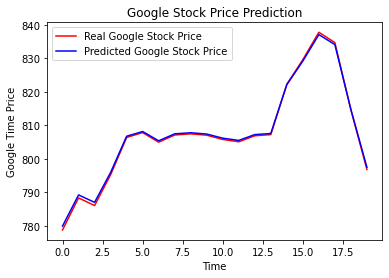

Epoch 1/200
40/40 [==============================] - 1s 3ms/step - loss: 0.0967
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0732
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0670
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0611
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0550
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0494
Epoch 7/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0434
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0381
Epoch 9/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0327
Epoch 10/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0275
Epoch 11/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0228
Epoch 12/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0186
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 5ms/step - loss: 2.5178e-04
Epoch 99/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5309e-04
Epoch 100/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5617e-04
Epoch 101/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4899e-04
Epoch 102/200
40/40 [==============================] - 0s 4ms/step - loss: 2.4877e-04
Epoch 103/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4778e-04
Epoch 104/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5431e-04
Epoch 105/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6512e-04
Epoch 106/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6318e-04
Epoch 107/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6846e-04
Epoch 108/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5178e-04
Epoch 109/200
40/40 [==============================] - 0s 5ms/step - 

40/40 [==============================] - 0s 6ms/step - loss: 2.6285e-04
Epoch 194/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5046e-04
Epoch 195/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5684e-04
Epoch 196/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5182e-04
Epoch 197/200
40/40 [==============================] - 0s 5ms/step - loss: 2.7425e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6229e-04
Epoch 199/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5640e-04
Epoch 200/200
40/40 [==============================] - 0s 6ms/step - loss: 2.7126e-04


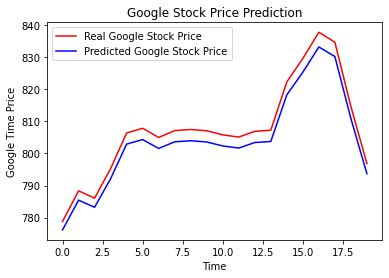

Epoch 1/200
40/40 [==============================] - 2s 4ms/step - loss: 0.0829
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0713
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0651
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0589
Epoch 5/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0527
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 7/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0406
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0347
Epoch 9/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0291
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0237
Epoch 11/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0189
Epoch 12/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0145
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 6ms/step - loss: 2.6134e-04
Epoch 99/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5799e-04
Epoch 100/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5176e-04
Epoch 101/200
40/40 [==============================] - 0s 6ms/step - loss: 2.4767e-04
Epoch 102/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5798e-04
Epoch 103/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5504e-04
Epoch 104/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5673e-04
Epoch 105/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5457e-04
Epoch 106/200
40/40 [==============================] - 0s 6ms/step - loss: 2.4864e-04
Epoch 107/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5647e-04
Epoch 108/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6346e-04
Epoch 109/200
40/40 [==============================] - 0s 5ms/step - 

40/40 [==============================] - 0s 5ms/step - loss: 2.6187e-04
Epoch 194/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6454e-04
Epoch 195/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5348e-04
Epoch 196/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4990e-04
Epoch 197/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4892e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 2.7721e-04
Epoch 199/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5283e-04
Epoch 200/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5067e-04


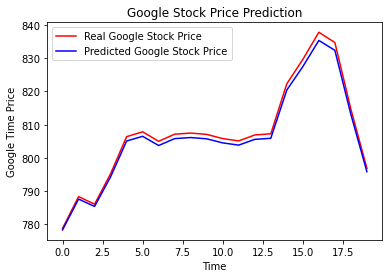

Epoch 1/200
40/40 [==============================] - 1s 3ms/step - loss: 0.1394
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0722
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0678
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0634
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0586
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0540
Epoch 8/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0494
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0450
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0403
Epoch 11/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0359
Epoch 12/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0316
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 4ms/step - loss: 2.4876e-04
Epoch 99/200
40/40 [==============================] - 0s 4ms/step - loss: 2.6362e-04
Epoch 100/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4993e-04
Epoch 101/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5191e-04
Epoch 102/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5319e-04
Epoch 103/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4880e-04
Epoch 104/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5031e-04
Epoch 105/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5448e-04
Epoch 106/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5167e-04
Epoch 107/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4979e-04
Epoch 108/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6297e-04
Epoch 109/200
40/40 [==============================] - 0s 4ms/step - 

40/40 [==============================] - 0s 7ms/step - loss: 2.7369e-04
Epoch 194/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5440e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 2.7260e-04
Epoch 196/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6592e-04
Epoch 197/200
40/40 [==============================] - 0s 5ms/step - loss: 2.7909e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5600e-04
Epoch 199/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5974e-04
Epoch 200/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5524e-04


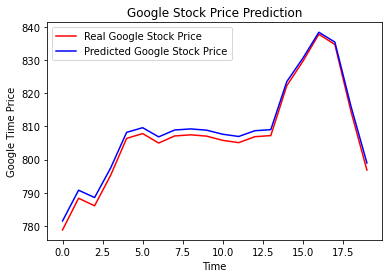

Epoch 1/200
40/40 [==============================] - 1s 4ms/step - loss: 0.3042
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0810
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0682
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0653
Epoch 5/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0624
Epoch 6/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0593
Epoch 7/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0559
Epoch 8/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0527
Epoch 9/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0490
Epoch 10/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0456
Epoch 11/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0420
Epoch 12/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0385
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 5ms/step - loss: 2.5171e-04
Epoch 99/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5790e-04
Epoch 100/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5541e-04
Epoch 101/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4702e-04
Epoch 102/200
40/40 [==============================] - 0s 6ms/step - loss: 2.6669e-04
Epoch 103/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5364e-04
Epoch 104/200
40/40 [==============================] - 0s 6ms/step - loss: 2.4781e-04
Epoch 105/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4872e-04
Epoch 106/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4948e-04
Epoch 107/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4973e-04
Epoch 108/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5354e-04
Epoch 109/200
40/40 [==============================] - 0s 5ms/step - 

40/40 [==============================] - 0s 5ms/step - loss: 2.7253e-04
Epoch 194/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5651e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5784e-04
Epoch 196/200
40/40 [==============================] - 0s 5ms/step - loss: 2.7203e-04
Epoch 197/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5642e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4814e-04
Epoch 199/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4690e-04
Epoch 200/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5537e-04


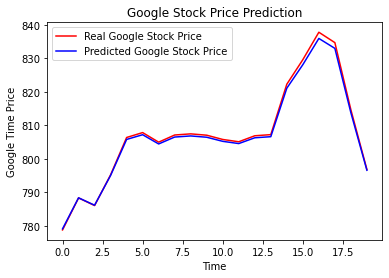

Epoch 1/200
40/40 [==============================] - 1s 4ms/step - loss: 0.1707
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0714
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0673
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0628
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0583
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0534
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 8/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0438
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0392
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0348
Epoch 11/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0303
Epoch 12/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0262
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 5ms/step - loss: 2.5490e-04
Epoch 99/200
40/40 [==============================] - 0s 4ms/step - loss: 2.6235e-04
Epoch 100/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5601e-04
Epoch 101/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5017e-04
Epoch 102/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4608e-04
Epoch 103/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5137e-04
Epoch 104/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4670e-04
Epoch 105/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5558e-04
Epoch 106/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5667e-04
Epoch 107/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5121e-04
Epoch 108/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4953e-04
Epoch 109/200
40/40 [==============================] - 0s 5ms/step - 

40/40 [==============================] - 0s 5ms/step - loss: 2.6393e-04
Epoch 194/200
40/40 [==============================] - 0s 5ms/step - loss: 2.8539e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6974e-04
Epoch 196/200
40/40 [==============================] - 0s 5ms/step - loss: 2.7842e-04
Epoch 197/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5119e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5456e-04
Epoch 199/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5616e-04
Epoch 200/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5581e-04


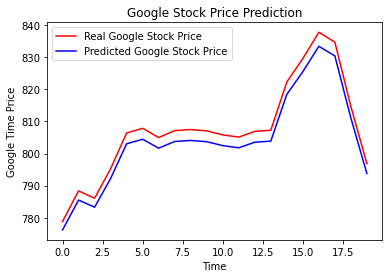

Epoch 1/200
40/40 [==============================] - 1s 5ms/step - loss: 0.1342
Epoch 2/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0798
Epoch 3/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0745
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0690
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0630
Epoch 6/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0573
Epoch 7/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0517
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 9/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0409
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0358
Epoch 11/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0306
Epoch 12/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0259
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 5ms/step - loss: 2.5484e-04
Epoch 99/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4963e-04
Epoch 100/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5113e-04
Epoch 101/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5518e-04
Epoch 102/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5130e-04
Epoch 103/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5364e-04
Epoch 104/200
40/40 [==============================] - 0s 5ms/step - loss: 2.8461e-04
Epoch 105/200
40/40 [==============================] - 0s 5ms/step - loss: 2.7103e-04
Epoch 106/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5155e-04
Epoch 107/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5555e-04
Epoch 108/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5166e-04
Epoch 109/200
40/40 [==============================] - 0s 4ms/step - 

40/40 [==============================] - 0s 6ms/step - loss: 2.4944e-04
Epoch 194/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5584e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5792e-04
Epoch 196/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6518e-04
Epoch 197/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6319e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5430e-04
Epoch 199/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5709e-04
Epoch 200/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5793e-04


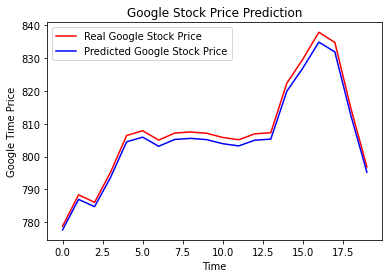

Epoch 1/200
40/40 [==============================] - 2s 3ms/step - loss: 0.0769
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0691
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0622
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0549
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0415
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 8/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0284
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0227
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0172
Epoch 11/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0128
Epoch 12/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 5ms/step - loss: 2.5932e-04
Epoch 99/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5114e-04
Epoch 100/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5458e-04
Epoch 101/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5305e-04
Epoch 102/200
40/40 [==============================] - 0s 4ms/step - loss: 2.6406e-04
Epoch 103/200
40/40 [==============================] - 0s 4ms/step - loss: 2.7094e-04
Epoch 104/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5989e-04
Epoch 105/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5096e-04
Epoch 106/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6403e-04
Epoch 107/200
40/40 [==============================] - 0s 4ms/step - loss: 2.6493e-04
Epoch 108/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5642e-04
Epoch 109/200
40/40 [==============================] - 0s 5ms/step - 

40/40 [==============================] - 0s 5ms/step - loss: 2.5897e-04
Epoch 194/200
40/40 [==============================] - 0s 5ms/step - loss: 2.8173e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6848e-04
Epoch 196/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5903e-04
Epoch 197/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5737e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5892e-04
Epoch 199/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5473e-04
Epoch 200/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5810e-04


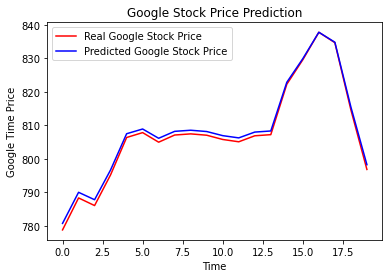

Epoch 1/200
40/40 [==============================] - 1s 4ms/step - loss: 0.2978
Epoch 2/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0762
Epoch 3/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0669
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0632
Epoch 5/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0591
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0550
Epoch 7/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0508
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 9/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0425
Epoch 10/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0387
Epoch 11/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0345
Epoch 12/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0308
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 5ms/step - loss: 2.5108e-04
Epoch 99/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5045e-04
Epoch 100/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5084e-04
Epoch 101/200
40/40 [==============================] - 0s 6ms/step - loss: 2.4660e-04
Epoch 102/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4725e-04
Epoch 103/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5079e-04
Epoch 104/200
40/40 [==============================] - 0s 4ms/step - loss: 2.4752e-04
Epoch 105/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5508e-04
Epoch 106/200
40/40 [==============================] - 0s 6ms/step - loss: 2.4641e-04
Epoch 107/200
40/40 [==============================] - 0s 6ms/step - loss: 2.4987e-04
Epoch 108/200
40/40 [==============================] - 0s 6ms/step - loss: 2.4835e-04
Epoch 109/200
40/40 [==============================] - 0s 6ms/step - 

40/40 [==============================] - 0s 5ms/step - loss: 2.4973e-04
Epoch 194/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5528e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5857e-04
Epoch 196/200
40/40 [==============================] - 0s 5ms/step - loss: 2.7380e-04
Epoch 197/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5754e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5638e-04
Epoch 199/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5821e-04
Epoch 200/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5655e-04


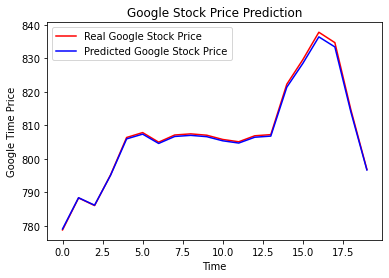

Epoch 1/200
40/40 [==============================] - 1s 4ms/step - loss: 0.0890
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0658
Epoch 3/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0600
Epoch 4/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0551
Epoch 5/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0497
Epoch 6/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0442
Epoch 7/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0394
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0338
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0290
Epoch 10/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0244
Epoch 11/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0199
Epoch 12/200
40/40 [==============================] - 0s 6ms/step - loss: 0.0156
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 5ms/step - loss: 2.4813e-04
Epoch 99/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4820e-04
Epoch 100/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5904e-04
Epoch 101/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6257e-04
Epoch 102/200
40/40 [==============================] - 0s 5ms/step - loss: 2.7066e-04
Epoch 103/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5484e-04
Epoch 104/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5870e-04
Epoch 105/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5265e-04
Epoch 106/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5097e-04
Epoch 107/200
40/40 [==============================] - 0s 6ms/step - loss: 2.6174e-04
Epoch 108/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5262e-04
Epoch 109/200
40/40 [==============================] - 0s 5ms/step - 

40/40 [==============================] - 0s 5ms/step - loss: 2.4880e-04
Epoch 194/200
40/40 [==============================] - 0s 5ms/step - loss: 2.8050e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5402e-04
Epoch 196/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4963e-04
Epoch 197/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5516e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5796e-04
Epoch 199/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5339e-04
Epoch 200/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5227e-04


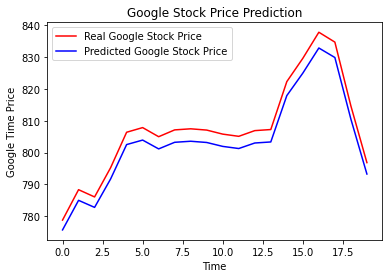

Epoch 1/200
40/40 [==============================] - 1s 4ms/step - loss: 0.3073
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0781
Epoch 3/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0683
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0650
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0615
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0581
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0540
Epoch 8/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0502
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0426
Epoch 11/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0388
Epoch 12/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0352
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 5ms/step - loss: 2.5407e-04
Epoch 99/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4877e-04
Epoch 100/200
40/40 [==============================] - 0s 4ms/step - loss: 2.4636e-04
Epoch 101/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4653e-04
Epoch 102/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5275e-04
Epoch 103/200
40/40 [==============================] - 0s 4ms/step - loss: 2.4569e-04
Epoch 104/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4906e-04
Epoch 105/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5110e-04
Epoch 106/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4985e-04
Epoch 107/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4797e-04
Epoch 108/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4879e-04
Epoch 109/200
40/40 [==============================] - 0s 5ms/step - 

40/40 [==============================] - 0s 5ms/step - loss: 2.6060e-04
Epoch 194/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5907e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5130e-04
Epoch 196/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5317e-04
Epoch 197/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6637e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6321e-04
Epoch 199/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5498e-04
Epoch 200/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5710e-04


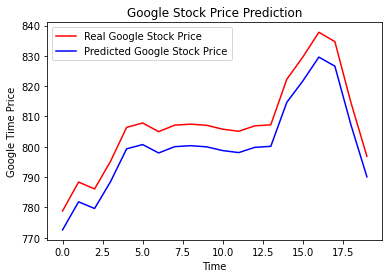

Epoch 1/200
40/40 [==============================] - 1s 4ms/step - loss: 0.1440
Epoch 2/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0685
Epoch 3/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0632
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0580
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0527
Epoch 6/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 7/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0422
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0375
Epoch 9/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0325
Epoch 10/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0280
Epoch 11/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0239
Epoch 12/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0200
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 5ms/step - loss: 2.5015e-04
Epoch 99/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5502e-04
Epoch 100/200
40/40 [==============================] - 0s 5ms/step - loss: 2.4610e-04
Epoch 101/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6182e-04
Epoch 102/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5414e-04
Epoch 103/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5077e-04
Epoch 104/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6061e-04
Epoch 105/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5251e-04
Epoch 106/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5325e-04
Epoch 107/200
40/40 [==============================] - 0s 6ms/step - loss: 2.5000e-04
Epoch 108/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5281e-04
Epoch 109/200
40/40 [==============================] - 0s 5ms/step - 

40/40 [==============================] - 0s 5ms/step - loss: 2.5783e-04
Epoch 194/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6077e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5579e-04
Epoch 196/200
40/40 [==============================] - 0s 5ms/step - loss: 2.5548e-04
Epoch 197/200
40/40 [==============================] - 0s 4ms/step - loss: 2.5343e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6280e-04
Epoch 199/200
40/40 [==============================] - 0s 5ms/step - loss: 2.7096e-04
Epoch 200/200
40/40 [==============================] - 0s 5ms/step - loss: 2.6142e-04


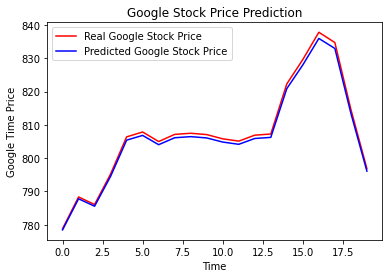

In [26]:
resultados_comparacion_fine_tuning = pd.DataFrame({"NumCapas": [], "NumNeuronas": [], "MSE": []})

for neuronas in range(30, 50):
    regressor = Sequential()

    # Añadimos una capa de entrada y la capa LSTM

    regressor.add(LSTM(units = neuronas, activation = 'sigmoid', input_shape = (None, 1)))

    # Añadimos la capa de salida con una única neurona

    regressor.add(Dense(units = 1))

    # Compilamos la RNN
    # usamos el error cuadrático medio
    # MSE para la regresión

    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Ajustamos la RNN al conjunto de entrenamiento

    regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

    prediccion = probar_resultado(regressor)
    resultados_comparacion_fine_tuning.loc[len(resultados_comparacion_fine_tuning)] = [1, neuronas, mean_squared_error(prediccion, real_stock_price)]


In [27]:
print(resultados_comparacion)

    NumCapas  NumNeuronas         MSE
0        1.0         10.0   44.862521
1        1.0         20.0   28.574889
2        1.0         30.0   34.016141
3        1.0         40.0    2.017673
4        2.0         10.0  129.054681
5        2.0         20.0   45.624783
6        2.0         30.0   28.917823
7        2.0         40.0    4.057304
8        3.0         10.0  122.434435
9        3.0         15.0  100.025874
10       3.0         20.0   45.912519
11       3.0         25.0  102.788701
12       3.0         30.0   36.193373
13       3.0         35.0   80.157307
14       3.0         40.0   83.845142
15       3.0         45.0   12.615369
